<a href="https://colab.research.google.com/github/vis-hal-k/Internship_Data_science/blob/main/cv2_freecode/section1/%232Transformation%26Contour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Transformations

In [15]:
boston = "/content/drive/MyDrive/Colab Notebooks/cv2_freecodecamp/Resources/Photos/park.jpg"

In [16]:
import cv2 as cv
import numpy as np 
from google.colab.patches import cv2_imshow 

In [17]:
i_park = cv.imread(boston) 

In [18]:
# ROUGH
np.float32([[1,0,1] , [1,2,3]])

array([[1., 0., 1.],
       [1., 2., 3.]], dtype=float32)

In [19]:
# Translation 
def translate(img, x, y):
  transMat = np.float32([[1,0,x],[0,1,y]])
  dim = (i_park.shape[1],i_park.shape[0])
  # dim = width , height
  return cv.warpAffine(img,transMat , dim)
#  cv.wrapAffine(src , Matrix , dsize , dst=None,flags=None, borderMode=None,borderValue=None)
# A transformation that can be expressed in the form of a matrix multiplication (linear transformation) followed by a vector addition (translation)
translated = translate( i_park, -100 , 100)
"""
-x -->  Left
-y --> Up
x  --> Right
y  --> Down 
"""

'\n-x -->  Left\n-y --> Up\nx  --> Right\ny  --> Down \n'

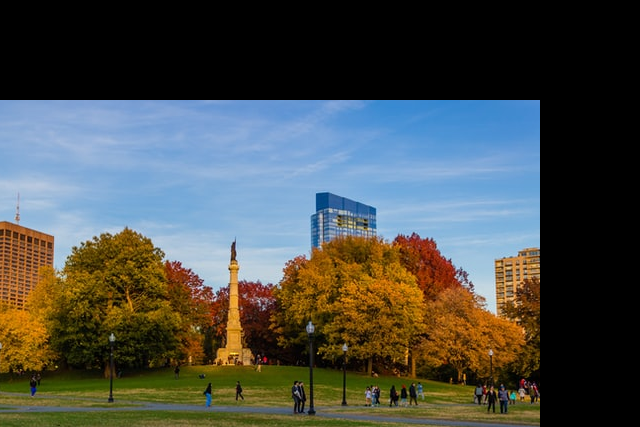

In [20]:
cv2_imshow(translated)

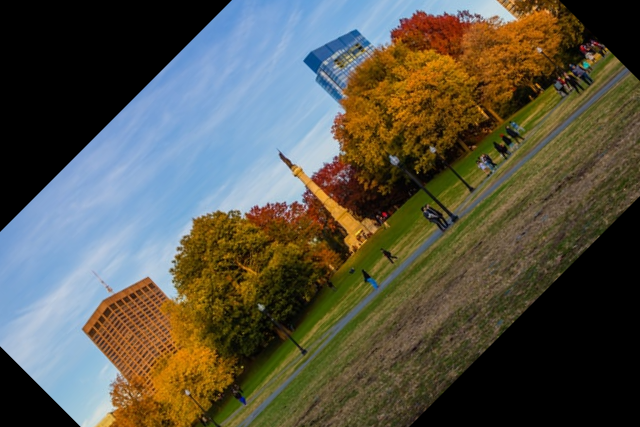

In [21]:
# Rotation -> Open cv provide to rotate the image wrt to any point and with desired angle.
def rotate(img , angle , rotpt=None):
  (height,width) = img.shape[:2]
  if rotpt is None:
    rotpt = (width//2,height//2)
      #remember rotate-Point store in (width and hieght) 
  rotMat = cv.getRotationMatrix2D(rotpt,angle,1.0) # this is rotation Matrix.
  #  cv.getRotationMatrix2D(centre , angle , scale ) // syntax
  dimension = (width , height)
  return cv.warpAffine(img, rotMat , dimension)

rotated = rotate(i_park , 45 ) # roated clockwise
#  to rotate clockwise use -ve sign i.e -45. 
cv2_imshow(rotated)



It is rotate by anticlockwise.

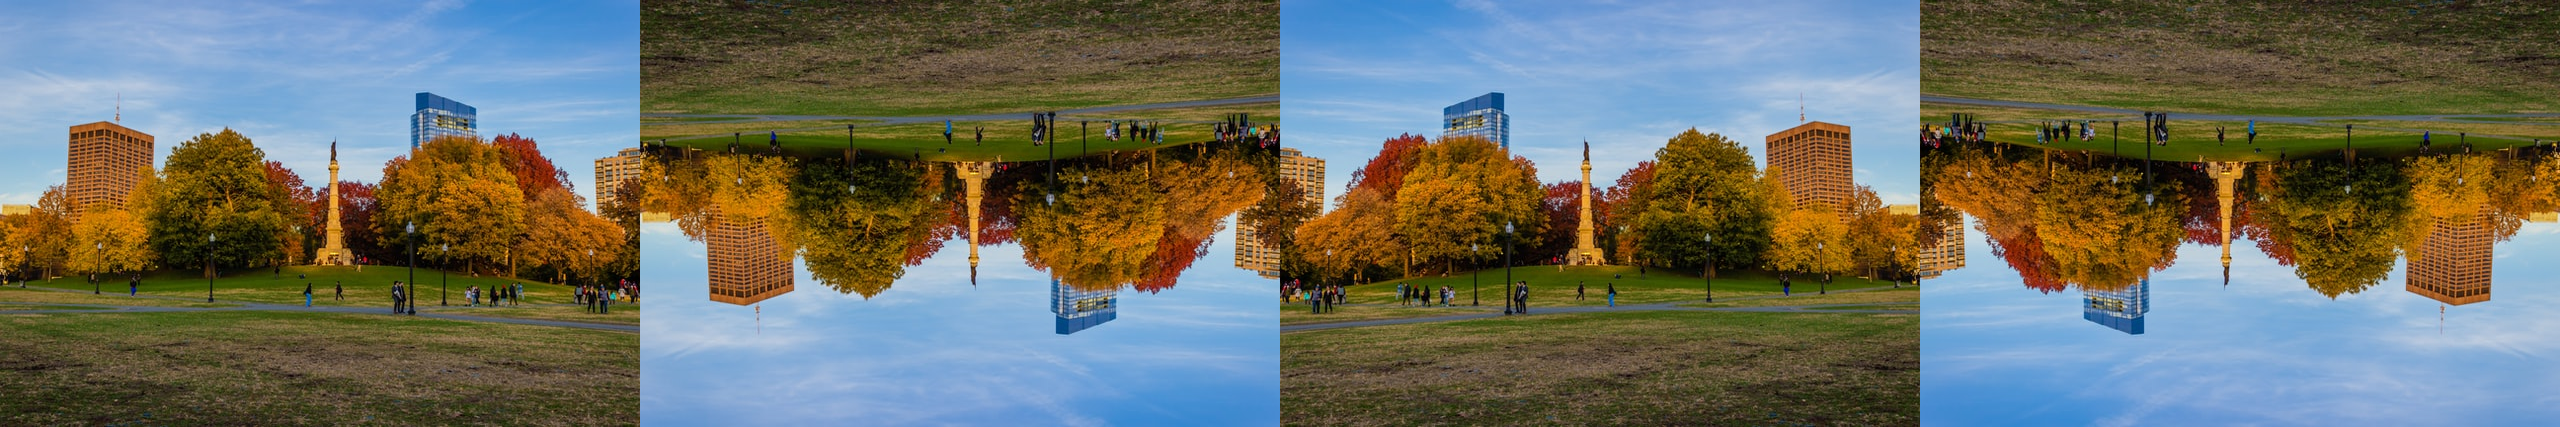

In [22]:
# Flipping 
# flip = cv.flip(src, flipcode)
"""
0  --> flipping the image vertically 
1  --> flipping the image horizontally
-1 --> flipping the image both in horizontally and vertically
"""
flip0 = cv.flip(i_park, 0)
flip1 = cv.flip(i_park, 1)
flip2 = cv.flip(i_park, -1)
cv2_imshow(np.hstack((i_park,flip0,flip1,flip2)))

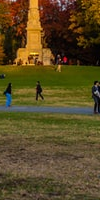

In [23]:
# CROPPING
cropped = i_park[200:400 , 300:400]
cv2_imshow(cropped)

# Contour Detection 

It is basically the boundaries of the object 

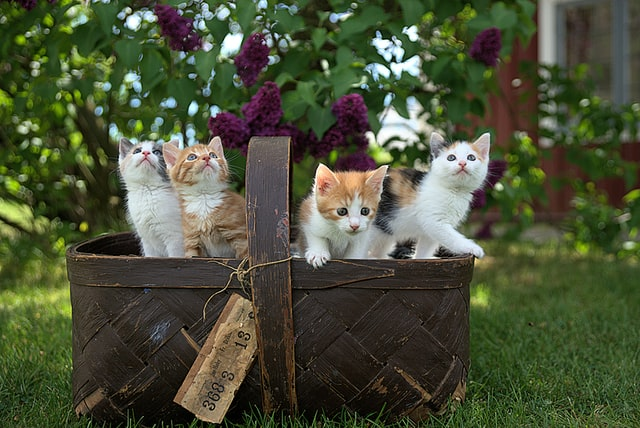

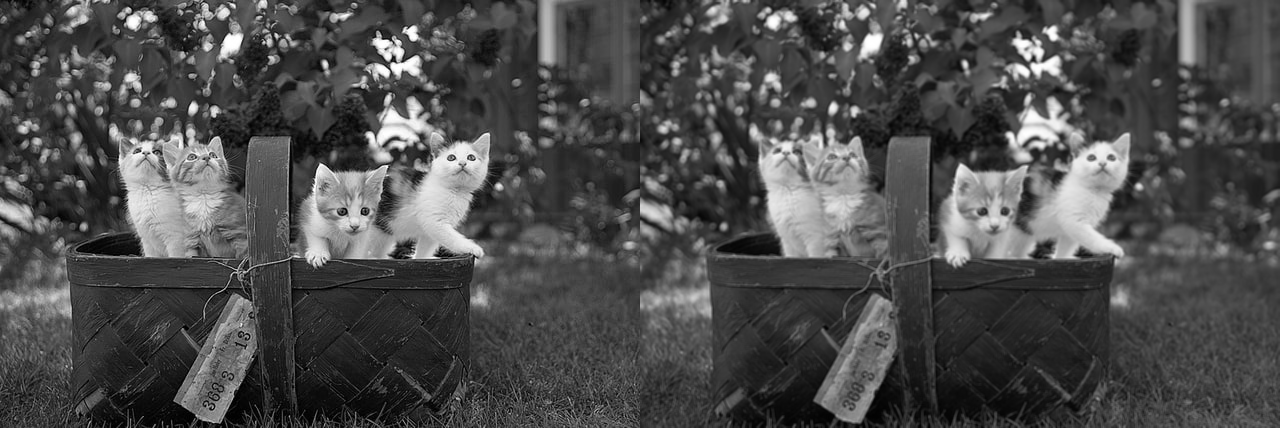

In [33]:
import cv2 as cv
import numpy as np 
cats = "/content/drive/MyDrive/Colab Notebooks/cv2_freecodecamp/Resources/Photos/cats.jpg"
i_cats = cv.imread(cats)
cv2_imshow(i_cats)
#  convert in gray scale.
g_cat = cv.cvtColor(i_cats , cv.COLOR_BGR2GRAY)
# blur 
b_cat = cv.GaussianBlur((g_cat) , (3,3) , cv.BORDER_DEFAULT )
cv2_imshow(np.hstack((g_cat,b_cat)))

### By canny 

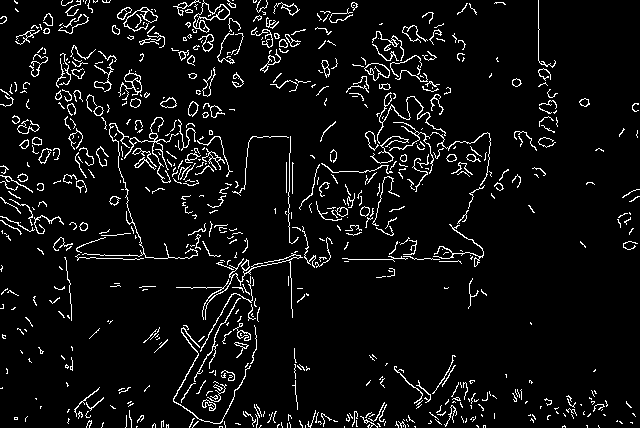

In [34]:
cannyimg = cv.Canny(b_cat , 120 , 175)
cv2_imshow(cannyimg)
# Now we grap the edges by canny edge detection 

In [27]:
#  contour
#  contour,hierarchies=cv.findContours(Canny,mode,method,contours=None,hierarchy=None,offset=None)
#  mode --> cv.RETR_TREE--> if you want over hierarchies contour | cv.RETR_EXTERNAL --> if you want external coutour |  cv.RETR_LIST --> If you want all contour in the image.
#  method --> cv.CHAIN_APPROX_NONE   | cv.CHAIN_APPROX_SIMPLE --> which compresses all the contours into simple required point 
# exp: it One line NONE find all the point in line for contour but SIMPLE only find the point at end point of the line & it make sense.
#  we have to blur an image before find contours

Start with the **findContours()** function. It has three required.

**image**: The binary input image obtained in the previous step.

**mode**: This is the contour-retrieval mode: 
<p>
Example:  <br> cv.RETR_EXTERNAL -> retrieves only the extreme outer contours. It sets hierarchy[i][2]=hierarchy[i][3]=-1 for all the contours. <br>
cv.RETR_LIST -> retrieves all of the contours without establishing any hierarchical relationships.<br>
cv.RETR_TREE ->  retrieves all of the contours and reconstructs a full hierarchy of nested contours.<br> 
RETR_FLOODFILL and RETR_CCOMP <br>
</p>

**method** : This defines the contour-approximation method. In this example, we will use CHAIN_APPROX_NONE.Though slightly slower than CHAIN_APPROX_SIMPLE, we will use this method here tol store ALL contour points. 

It’s worth emphasizing here that mode refers to the type of contours that will be retrieved, while method refers to which points within a contour are stored.

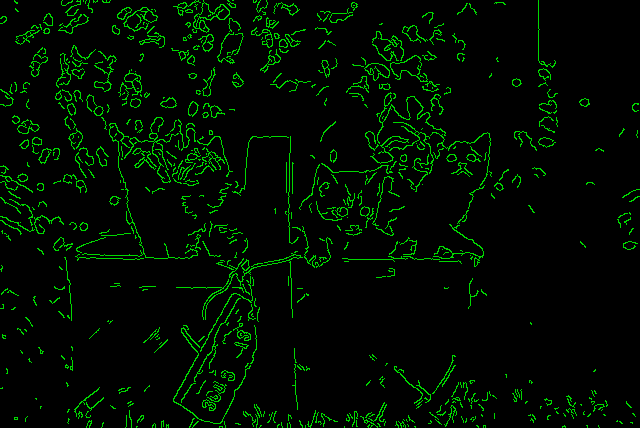

In [50]:
#  apply contour in cannyimg
black  = np.zeros(i_cats.shape , dtype = 'uint8')
contourss , hierarchies  = cv.findContours(cannyimg , cv.RETR_LIST , cv.CHAIN_APPROX_SIMPLE) 
cv.drawContours(black , contourss , -1 , (0,215,0) , 1  )
cv2_imshow(black)

### By Thresholding

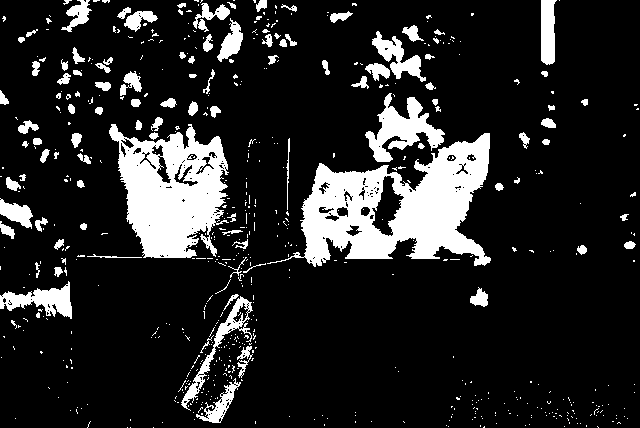

In [46]:
# Lets make np.zseros black image 
black  = np.zeros(i_cats.shape , dtype = 'uint8')
# Apply Threshold over grayscale image g_cat
ret,thresh = cv.threshold(g_cat , 125 , 255 , cv.THRESH_BINARY )
cv2_imshow(thresh)

In [40]:
#  cv.findContour
contours, hierarchies  = cv.findContours(thresh , cv.RETR_LIST , cv.CHAIN_APPROX_SIMPLE)
print("length of contour = " , len(contours))

length of contour =  839


**drawContours() function** to overlay the contours on the RGB image. This function has four required and several optional arguments. The first four arguments below are required.

**image**: This is the input RGB image on which you want to draw the contour.

**contours**: Indicates the contours obtained from the findContours() function.

**contourIdx**: The pixel coordinates of the contour points are listed in the obtained contours. Using this argument, you can specify the index position from this list, indicating exactly which contour point you want to draw. Providing a negative value will draw all the contour points.

**color**: This indicates the color of the contour points you want to draw. We are drawing the points in green.

**thickness**: This is the thickness of contour points.

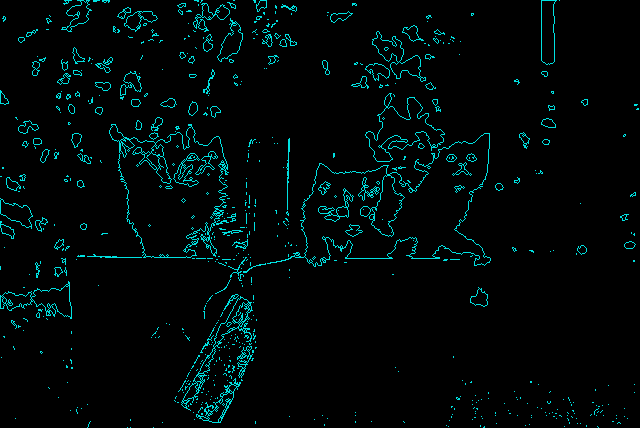

In [45]:
cv.drawContours(black , contours , -1 , (225,225,0) , 1)
cv2_imshow(black)

Lets try to find the contour obn the image by threshold

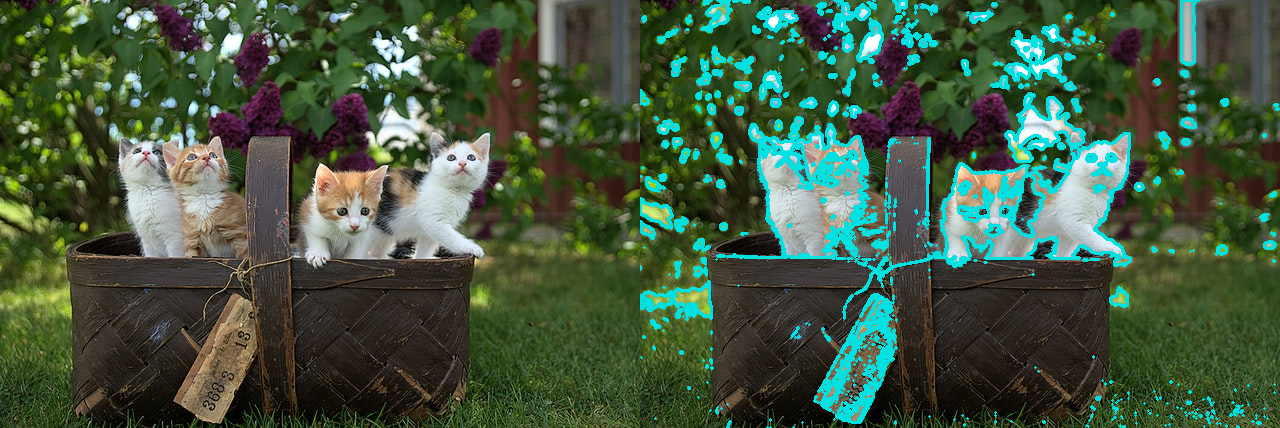

In [54]:
i_cats_copy = i_cats.copy()
cv.drawContours(i_cats_copy , contours , -1 , (225,225,0) , 2)
cv2_imshow(np.hstack((i_cats ,i_cats_copy)))